In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.histomics import reg_edge, vesselness
import tables
from IPython.display import display, Javascript
from modules import utility
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()


Using TensorFlow backend.


<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [2]:
#######################################################
# Get data
#######################################################
data_path = '/media/marsdenlab/Data2/datasets/DeepLofting/'
train = data_path+'train_192_ct.hdf5'
val = data_path+'val_192_ct.hdf5'
test = data_path+'test_192_ct.hdf5'

f_train = tables.open_file(train)
f_val = tables.open_file(val)


input_shape = f_train.root.X.shape
output_shape = f_train.root.Y.shape
print input_shape, output_shape

print 'data shapes, train={},{}'.format(input_shape,output_shape)
print f_val.root.X.shape
print f_val.root.X.dtype

(127788, 192, 192, 1) (127788, 192, 192, 1)
data shapes, train=(127788, 192, 192, 1),(127788, 192, 192, 1)
(6561, 192, 192, 1)
float16


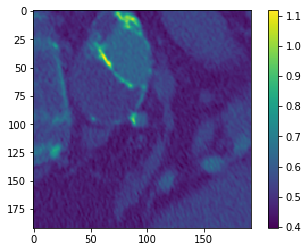

In [86]:
img = f_val.root.X[2000,:,:,0].astype(float)
plt.imshow(img.astype(np.float32))
plt.colorbar()
plt.show()

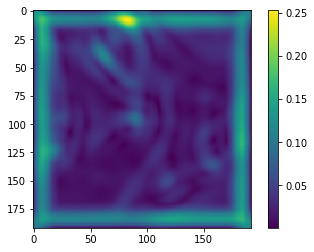

In [87]:
d,f,e,t = vesselness(img,8.0)

plt.imshow(f)
plt.colorbar()
plt.show()

In [88]:
# imgt=(-utility.threshold(img,0.55)*2+1)
imgt = np.zeros_like(img).astype(float)
# rad = 5
# h,w = imgt.shape
# for i in range(imgt.shape[0]):
#     for j in range(imgt.shape[1]):
#         if np.sqrt((i-h/2)**2+(j-w/2)**2) <= rad:
#             imgt[i,j]=-1.0
            
# imgt=imgt*2+1

imgt[0,:]=1.0
imgt[-1,:]=1.0
imgt[:,0] = 1.0
imgt[:,-1] = 1.0
imgt[imgt<1] = -1.0

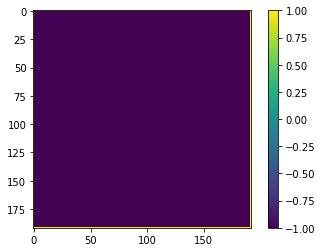

In [89]:
plt.imshow(imgt.astype(float))
plt.colorbar()
plt.show()

In [94]:
ls = reg_edge(img.astype(float)*2000.0,imgt.astype(float))

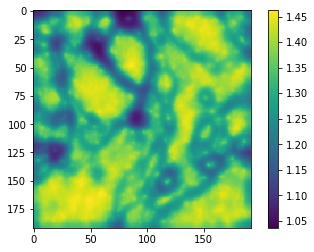

In [95]:
plt.imshow(-ls)
plt.colorbar()
plt.show()

In [96]:
conts = utility.marchingSquares(-ls.astype(np.float32),iso=np.mean(-ls),mode='center')

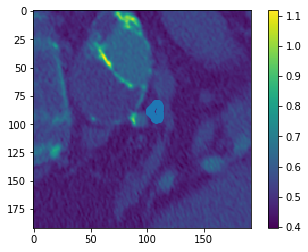

In [97]:
plt.imshow(img.astype(np.float32))
plt.colorbar()
plt.scatter(conts[:,0],conts[:,1])
plt.show()